[0.0 0.0 0.0 ..., -0.3 -0.5000001000000001 -0.05]
Number of data points (35581, 7)
steering angle max value is 1.0
steering angle min value is -1.0
Shape of zero data before filtering (22632, 7)
Shape of zero data after filtering (3395, 7)
Filtered shape (16344, 7)
raw data steering angle max value is 1.0
raw data steering angle min value is -1.0


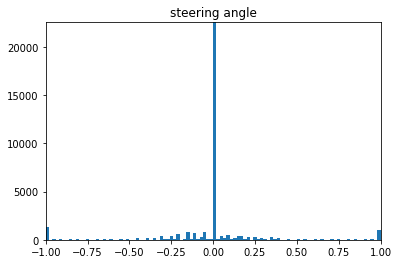

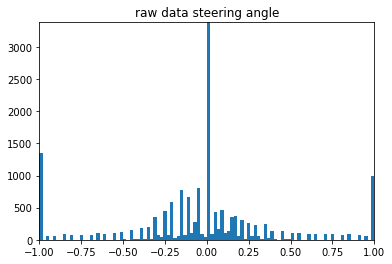

In [23]:
from pandas.io.parsers import read_csv
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def draw_data_hist(data, header):
    plt.figure()
    print(header,"max value is", max(data))
    print(header,"min value is", min(data))
    unique_values, counts = np.unique(data, return_counts=True)
    plt.hist(data, bins=min(len(counts), 100))
    plt.title(header)
    plt.axis([min(data), max(data), 0, max(counts)]);

drive_info = read_csv("combined/driving_log.csv", header=0, usecols=[0,1,2,3,4,5,6],skipinitialspace=True).as_matrix();
print(drive_info[:,3])
print("Number of data points", drive_info.shape)
draw_data_hist(drive_info[:,3], 'steering angle');

def balanced_subsample(y):
    index_range = range(y.shape[0])
    size = int(np.ceil(y.shape[0] * 0.15))
    indexes = np.random.choice(index_range, size=size, replace=False)
    return y[indexes]

# Only keep sample of zero angle records
filtered_data = drive_info[abs(drive_info[:, 3]) > 0.01]
zero_data = drive_info[abs(drive_info[:, 3]) <= 0.01]
print('Shape of zero data before filtering', zero_data.shape)

zero_samples = balanced_subsample(zero_data)
print('Shape of zero data after filtering', zero_samples.shape)

raw_data = np.row_stack((filtered_data, zero_samples))
print('Filtered shape', raw_data.shape)

draw_data_hist(raw_data[:,3], 'raw data steering angle');

Training data shape after augmentation (95841, 4)
Validation data shape (4904, 4)
Training data steering angle max value is 1.1
Training data steering angle min value is -1.1
Validation data steering angle max value is 1.0
Validation data steering angle min value is -1.0


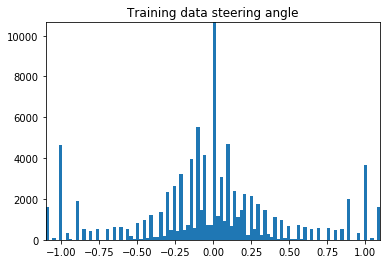

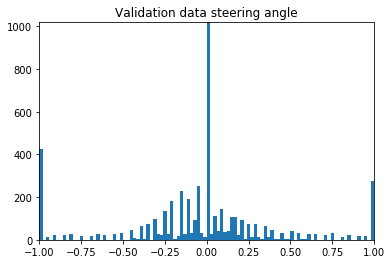

In [24]:
import pandas as pd
train_data = pd.read_pickle('train_file.p')
valid_data = pd.read_pickle('valid_file.p')

print('Training data shape after augmentation', train_data.shape)
print('Validation data shape', valid_data.shape)
    
draw_data_hist(train_data.ix[:,1], 'Training data steering angle');
draw_data_hist(valid_data.ix[:,1], 'Validation data steering angle');
